In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement_data = Base.classes.measurement
Station_data = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#recent_year = session.query("SELECT measurement.prcp FROM measurement WHERE date BETWEEN '8/9/2017' AND '8/9/2016';")
#print(recent_year)
recent_year = session.query(Measurement_data.date).order_by(Measurement_data.date.desc()).first()

# Calculate the date 1 year ago from the last data point in the database
date_1 = dt.date(2017, 8, 23) - dt.timedelta(days =365)
print(f'1 year ago from the last data point is {date_1}')

# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement_data.date, Measurement_data.prcp).filter(Measurement_data.date >= date_1).order_by(Measurement_data.date).statement

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
date_df = pd.read_sql_query(scores, session.bind)
date_df.set_index('date', inplace=True)
date_df.columns = ['precipitation']
date_df.head()

1 year ago from the last data point is 2016-08-23


,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station_data).count()
print(f"there are {stations} stations in the dataset.")


there are 9 stations in the dataset.


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = session.query(Measurement_data.station, func.count(Measurement_data.tobs)).group_by(Measurement_data.station).order_by(func.count(Measurement_data.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# Station_activity's first entry is 'USC00519281'
highest_temp = session.query(func.min(Measurement_data.tobs)).filter(Measurement_data.station == 'USC00519281').all()
lowest_temp = session.query(func.max(Measurement_data.tobs)).filter(Measurement_data.station == 'USC00519281').all()
avg_temp = session.query(func.avg(Measurement_data.tobs)).filter(Measurement_data.station == 'USC00519281').all()
print(f"highest temp is {highest_temp} \nlowest temp is {lowest_temp} \naverage temp is {avg_temp}")


highest temp is [(54.0,)] 
lowest temp is [(85.0,)] 
average temp is [(71.66378066378067,)]


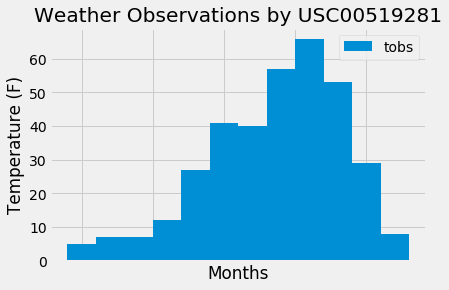

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Station_activity's first entry is 'USC00519281'
temps = session.query(Measurement_data.tobs).filter(Measurement_data.station == 'USC00519281').filter(Measurement_data.date>=date_1).all()
temp_freq_df = pd.DataFrame(temps)
temp_freq_df.head()
temp_freq_df.plot.hist(bins=12)
plt.title('Weather Observations by USC00519281')
plt.ylabel('Temperature (F)')
plt.xlabel('Months')
plt.tick_params(axis='x', labelbottom=False)